In [633]:
import random
from matplotlib import pyplot as plt
import copy
    

In [621]:
#Natural Selection
class Person:
    traitlist = ['FAST','SLOW','EFFICIENT',None]
    nextid = 1
    fastmutations = 1
    slowmutations = 1
    efficientmutations  = 1
    totalmutations = 3
    def __init__(self,trait,mutationsallowed):
        self.mutationsallowed = mutationsallowed
        self.trait = trait #list
        self.food = 0
        self.id = Person.nextid
        self.lifelimit = 10
        Person.nextid  += 1
        self.priority = 0
        if self.mutationsallowed != False and random.randint(1,3) == 3 and self.trait == None:
            self.trait = Person.traitlist[random.randint(0,len(Person.traitlist)-1)]
        if self.trait == 'FAST':
            self.priority -= 1
        if self.trait == 'SLOW':
            self.priority += 1
    def reproduce(self):
        babyperson = Person(self.trait,self.mutationsallowed)
        Environment.addperson(babyperson)
   
    def terminate(self):
        Environment.terminate(self.id)
        
        
class Environment:
    occupants = {}
    availablefood = 0
    
    @classmethod
    def addperson(cls,person):
        cls.occupants[person.id] = person
        
    @classmethod
    def terminate(cls,id):
        del cls.occupants[id]
        
    @classmethod
    def newday(cls,foodperday):
        fastpop = 0
        slowpop = 0
        efficientpop = 0 
        normalpop = 0
        totalpop = 0
        cls.availablefood = foodperday
        toccupants = list(cls.occupants.keys())
        random.shuffle(toccupants)
        #print('occupants {}'.format([(id, cls.occupants[id].priority) for id in toccupants]))
        fastlist = []
        normlist = []
        slowlist = []
        for person in toccupants:
            if cls.occupants[person].priority == -1:
                fastlist.append(person)
            if cls.occupants[person].priority == 0:
                normlist.append(person)
            if cls.occupants[person].priority == 1:
                slowlist.append(person)
        ticks = 0
        while cls.availablefood >= 1 and ticks <100:
            ticks +=1
            for person in fastlist: 
                temp = random.randint(1,100)
                if temp >= 1 and temp <= 5+(5*ticks):
                    cls.availablefood -= 1
                    cls.occupants[person].food +=1
            for person in normlist:
                temp = random.randint(1,100)
                if cls.availablefood > 0:
                    if temp >= 1 and temp <= (6*ticks):
                        cls.availablefood -= 1
                        cls.occupants[person].food +=1
            for person in slowlist:
                temp = random.randint(1,100)
                if temp >= 1 and temp <= +6*ticks:
                    cls.availablefood -= 1
                    cls.occupants[person].food +=1
        for person in list(cls.occupants.values()):
            if person.food < 1:
                person.terminate()
            if person.food == 1:
                if person.trait == 'EFFICIENT' and random.randint(0,2) == 0:
                    person.reproduce()
                    person.food = 0
                    person.lifelimit -=1
                    if person.lifelimit <= 0:
                        person.terminate
                else:
                    person.food = 0
                    person.lifelimit -= 1
                    if person.lifelimit <= 0:
                        person.terminate
            elif person.food >= 2:
                person.reproduce()
                person.food = 0
                person.lifelimit -=1
                if person.lifelimit <= 0:
                    person.terminate
        for person in list(cls.occupants.values()):
            totalpop +=1
            if person.trait == 'FAST':
                fastpop += 1
            if person.trait == 'SLOW':
                slowpop +=1
            if person.trait == 'EFFICIENT':
                efficientpop +=1
            if person.trait == None:
                normalpop +=1
        return (totalpop,fastpop,slowpop,efficientpop,normalpop)
        


def main(simlength,startingnum,mutationsallowed,preset_trait,foodperday,customtraitslist):
    #Mutations Allowed is True or False. 
    #Preset_trait is False or a trait ('FAST','SLOW','EFFICIENT')
    #Customtriatslist overrides preset_trait and startingnum
    Environment.occupants = {}
    populationbyday = []
    fastpopulationbyday = []
    slowpopulationbyday = []
    efficientpopulationbyday = []
    normalpopulationbyday = []
    # initializes
    if customtraitslist != None:
        for i in customtraitslist:
            Environment.addperson(Person(i,mutationsallowed))
    else:
        for i in range(startingnum):
            if preset_trait == None:
                if mutationsallowed == False:
                    Environment.addperson(Person(None,False))
                else:
                    Environment.addperson(Person(None,True))
            else:
                if mutationsallowed == False:
                    Environment.addperson(Person(preset_trait,False))
                else:
                    Environment.addperson(Person(preset_trait,True))
    # start simulation
    for i in range(simlength):
        data = Environment.newday(foodperday)
        #DATA STUFF
        populationbyday.append(data[0]) 
        fastpopulationbyday.append(data[1])
        slowpopulationbyday.append(data[2])
        efficientpopulationbyday.append(data[3])
        normalpopulationbyday.append(data[4])
        #For Bugtesting/Balancing: print (f'population: {data[0]}, fastpopulation: {data[1]}, slowpopulation: {data[2]}, efficientpopulation: {data[3]}, normalpopulation: {data[4]}')
    return [populationbyday,fastpopulationbyday,slowpopulationbyday,efficientpopulationbyday,normalpopulationbyday]
        

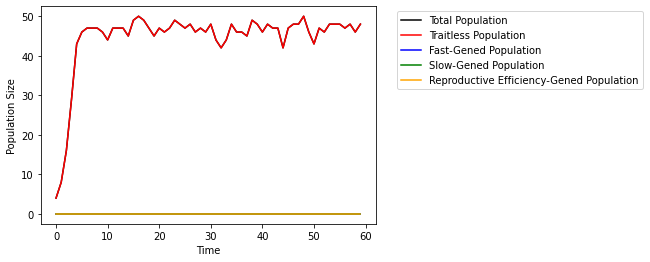

In [622]:
data = main(60,2,False,None,50,None)

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

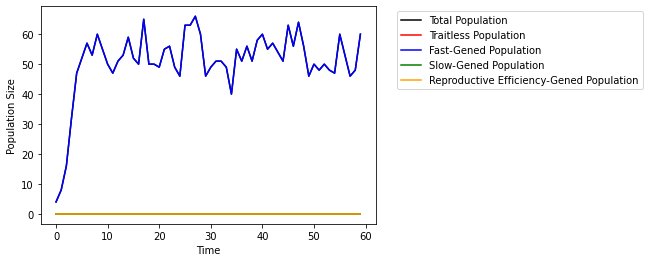

In [601]:
data = main(60,2,False,'FAST',50,None)

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

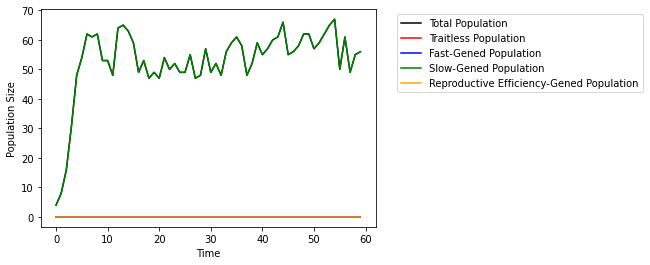

In [603]:
data = main(60,2,False,'SLOW',50,None)

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

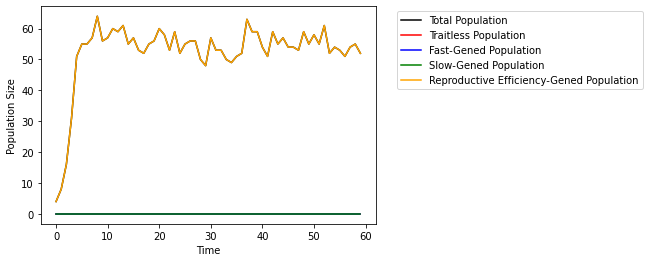

In [604]:
data = main(60,2,False,'EFFICIENT',50,None)

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

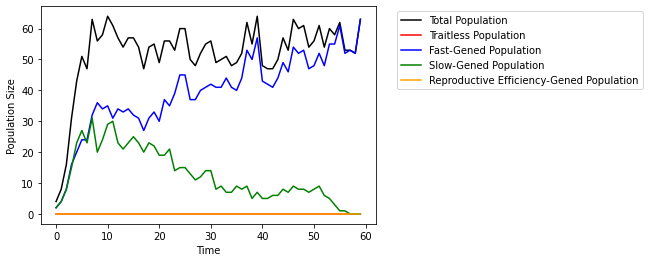

In [631]:
#MUTATIONS OFF, FAST VS SLOW
data = main(60,2,False,None,50,['FAST','SLOW'])

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

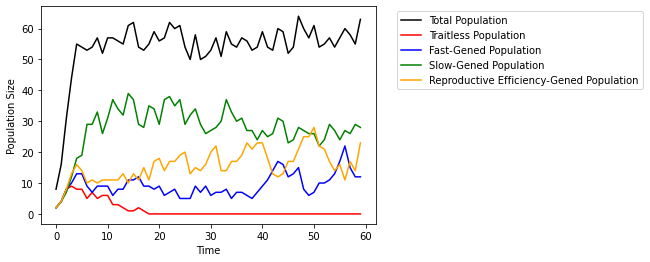

In [630]:
#MUTATIONS OFF, ALL GENE TYPES 
data = main(60,4,False,None,50,['FAST','SLOW','EFFICIENT',None])

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))

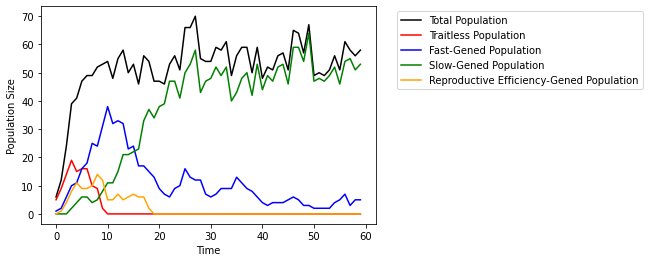

In [593]:
#MUTATIONS ON, ALL GENE TYPES
data = main(60,3,True,None,50,None)

plt.plot(range(len(data[0])),data[0],label= 'Total Population',color='black')
plt.plot(range(len(data[4])),data[4],label= 'Traitless Population',color='red')
plt.plot(range(len(data[1])),data[1],label= 'Fast-Gened Population',color='blue')
plt.plot(range(len(data[2])),data[2],label= 'Slow-Gened Population',color='green')
plt.plot(range(len(data[3])),data[3],label= 'Reproductive Efficiency-Gened Population',color='orange')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend(loc='upper left',prop={'size': 10},bbox_to_anchor=(1.05, 1))
